## Data pre-processing 

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
samples = pd.read_csv("http://139.91.190.186/tei/bioinformatics/LungVSnormal.txt", sep = '\t')

In [63]:
samples

,Gene,LungTumor,Normal,LungTumor.1,Normal.1,LungTumor.2,LungTumor.3,LungTumor.4,Normal.2,LungTumor.5,...,LungTumor.53,Normal.44,LungTumor.54,Normal.45,LungTumor.55,Normal.46,LungTumor.56,LungTumor.57,Normal.47,Normal.48
0,1007_s_at,10.93,10.42,10.63,10.15,10.99,10.78,10.57,10.48,10.55,...,10.73,10.74,10.53,10.19,10.77,10.47,10.90,10.87,10.29,10.41
1,1053_at,6.90,6.92,7.55,6.70,6.83,6.72,6.74,6.72,7.10,...,6.86,6.74,6.96,7.01,6.74,6.80,6.84,6.63,6.79,6.36
2,117_at,8.11,7.76,7.97,7.71,7.78,7.78,7.89,8.06,8.01,...,7.74,7.81,8.09,8.14,8.16,7.86,8.01,7.89,8.16,7.97
3,121_at,9.45,9.52,9.81,9.52,9.86,9.86,10.13,9.88,10.11,...,10.09,10.01,9.83,10.11,9.79,9.65,9.87,9.87,9.82,9.85
4,1255_g_at,4.81,4.72,4.91,4.82,4.82,4.85,5.13,5.04,4.89,...,5.05,4.76,4.90,4.95,4.61,4.76,4.79,4.97,4.82,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,4.97,5.05,5.40,5.14,5.15,5.20,5.49,5.26,5.44,...,5.30,5.04,5.19,5.23,5.13,5.19,5.07,5.43,5.19,5.30
22279,AFFX-ThrX-M_at,4.45,4.46,4.64,4.60,4.58,4.53,4.75,4.49,4.65,...,4.42,4.45,4.42,4.66,4.41,4.39,4.47,4.69,4.56,4.63
22280,AFFX-TrpnX-3_at,4.03,4.04,4.07,3.99,4.07,3.99,4.16,4.14,4.07,...,4.23,4.12,4.07,4.01,4.05,4.09,4.10,4.25,4.10,4.14
22281,AFFX-TrpnX-5_at,4.50,4.54,4.70,4.61,4.63,4.59,4.76,4.61,4.70,...,4.72,4.51,4.71,4.67,4.65,4.55,4.62,4.75,4.70,4.76


In [64]:
lungTumor_samples = samples[samples.columns[pd.Series(samples.columns).str.startswith('LungTumor')]]
normal_samples = samples[samples.columns[pd.Series(samples.columns).str.startswith('Normal')]]
gene_id = samples[samples.columns[pd.Series(samples.columns).str.startswith('Gene')]]

In [65]:
sorted_samples = pd.concat([gene_id, lungTumor_samples], axis=1)
sorted_samples = pd.concat([sorted_samples, normal_samples], axis=1)
sorted_samples

,Gene,LungTumor,LungTumor.1,LungTumor.2,LungTumor.3,LungTumor.4,LungTumor.5,LungTumor.6,LungTumor.7,LungTumor.8,...,Normal.39,Normal.40,Normal.41,Normal.42,Normal.43,Normal.44,Normal.45,Normal.46,Normal.47,Normal.48
0,1007_s_at,10.93,10.63,10.99,10.78,10.57,10.55,10.55,10.68,10.52,...,10.20,10.15,10.12,10.33,10.71,10.74,10.19,10.47,10.29,10.41
1,1053_at,6.90,7.55,6.83,6.72,6.74,7.10,6.98,7.16,6.86,...,6.49,6.76,6.55,6.77,6.71,6.74,7.01,6.80,6.79,6.36
2,117_at,8.11,7.97,7.78,7.78,7.89,8.01,8.61,7.90,8.07,...,7.88,8.58,8.07,7.61,7.85,7.81,8.14,7.86,8.16,7.97
3,121_at,9.45,9.81,9.86,9.86,10.13,10.11,9.92,9.81,9.89,...,9.91,9.84,9.74,10.02,9.98,10.01,10.11,9.65,9.82,9.85
4,1255_g_at,4.81,4.91,4.82,4.85,5.13,4.89,5.15,4.99,4.78,...,4.92,4.73,4.88,4.93,4.72,4.76,4.95,4.76,4.82,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,4.97,5.40,5.15,5.20,5.49,5.44,5.37,5.24,5.45,...,5.53,5.35,5.46,5.13,5.10,5.04,5.23,5.19,5.19,5.30
22279,AFFX-ThrX-M_at,4.45,4.64,4.58,4.53,4.75,4.65,4.59,4.70,4.86,...,4.88,4.65,4.75,4.59,4.49,4.45,4.66,4.39,4.56,4.63
22280,AFFX-TrpnX-3_at,4.03,4.07,4.07,3.99,4.16,4.07,4.35,4.15,4.40,...,4.25,4.27,4.17,4.06,4.12,4.12,4.01,4.09,4.10,4.14
22281,AFFX-TrpnX-5_at,4.50,4.70,4.63,4.59,4.76,4.70,4.87,4.69,5.05,...,4.72,4.79,4.72,4.61,4.66,4.51,4.67,4.55,4.70,4.76


In [66]:
labels = sorted_samples.columns

In [67]:
for x in range(len(labels)):
    if(labels[x].startswith('LungTumor') ):
        labels.values[x] = 'LungTumor';
    elif(labels[x].startswith('Normal') ):
        labels.values[x] = 'Normal';
labels

Index(['Gene', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       ...
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal'],
      dtype='object', length=108)

In [68]:
labels = labels[1:]

In [69]:
data = sorted_samples.T
data = data.iloc[1: , :] # data does not include gene names

In [70]:
data

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
LungTumor,10.93,6.9,8.11,9.45,4.81,8.77,5.88,6.03,8.65,4.65,...,4.66,5.56,12.65,13.02,5.21,4.97,4.45,4.03,4.5,4.4
LungTumor,10.63,7.55,7.97,9.81,4.91,8.41,6.21,6.06,8.88,4.95,...,5.47,6.51,12.76,12.66,5.49,5.4,4.64,4.07,4.7,4.71
LungTumor,10.99,6.83,7.78,9.86,4.82,9.1,6.19,6.12,7.75,4.97,...,4.99,5.43,12.7,13.03,5.47,5.15,4.58,4.07,4.63,4.63
LungTumor,10.78,6.72,7.78,9.86,4.85,8.75,6.27,6.15,8.08,5.41,...,4.85,5.78,12.58,12.89,5.3,5.2,4.53,3.99,4.59,4.55
LungTumor,10.57,6.74,7.89,10.13,5.13,8.95,6.36,6.19,8.07,4.92,...,5.08,5.84,12.49,12.78,5.52,5.49,4.75,4.16,4.76,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,10.74,6.74,7.81,10.01,4.76,8.93,6.43,5.93,7.98,5.04,...,5.4,5.8,13.2,13.24,5.37,5.04,4.45,4.12,4.51,4.69
Normal,10.19,7.01,8.14,10.11,4.95,9.31,6.45,6.05,8.67,5.22,...,5.53,6.1,12.73,12.71,5.36,5.23,4.66,4.01,4.67,4.86
Normal,10.47,6.8,7.86,9.65,4.76,9.37,6.19,6.23,8.41,4.8,...,4.71,5.55,12.96,12.96,5.26,5.19,4.39,4.09,4.55,4.63
Normal,10.29,6.79,8.16,9.82,4.82,9.54,6.25,6.25,8.43,4.91,...,4.86,5.61,13.03,13.18,5.43,5.19,4.56,4.1,4.7,4.7


In [71]:
genes = sorted_samples.iloc[:,0]
genes #gene names

0              1007_s_at
1                1053_at
2                 117_at
3                 121_at
4              1255_g_at
              ...       
22278     AFFX-ThrX-5_at
22279     AFFX-ThrX-M_at
22280    AFFX-TrpnX-3_at
22281    AFFX-TrpnX-5_at
22282    AFFX-TrpnX-M_at
Name: Gene, Length: 22283, dtype: object

3. Χωρίστε τα δεδομένα σας σε train & test με το train να είναι το 70% των δειγμάτων με τυχαία δειγματοληψία και το test το υπόλοιπο 30%.

In [72]:
split = 0.7
msk = np.random.rand(len(labels)) < split
msk

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True])

In [73]:
msk.shape

(107,)

In [74]:
trainingSet = data.loc[msk, :]
trainingSet

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
LungTumor,10.63,7.55,7.97,9.81,4.91,8.41,6.21,6.06,8.88,4.95,...,5.47,6.51,12.76,12.66,5.49,5.4,4.64,4.07,4.7,4.71
LungTumor,10.99,6.83,7.78,9.86,4.82,9.1,6.19,6.12,7.75,4.97,...,4.99,5.43,12.7,13.03,5.47,5.15,4.58,4.07,4.63,4.63
LungTumor,10.78,6.72,7.78,9.86,4.85,8.75,6.27,6.15,8.08,5.41,...,4.85,5.78,12.58,12.89,5.3,5.2,4.53,3.99,4.59,4.55
LungTumor,10.57,6.74,7.89,10.13,5.13,8.95,6.36,6.19,8.07,4.92,...,5.08,5.84,12.49,12.78,5.52,5.49,4.75,4.16,4.76,4.65
LungTumor,10.55,7.1,8.01,10.11,4.89,8.28,6.39,6.33,7.48,4.95,...,5.84,7.86,12.94,13,5.44,5.44,4.65,4.07,4.7,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normal,10.12,6.55,8.07,9.74,4.88,9.31,6.71,6.09,8.33,5.11,...,5.19,5.96,12.94,12.96,5.46,5.46,4.75,4.17,4.72,4.91
Normal,10.19,7.01,8.14,10.11,4.95,9.31,6.45,6.05,8.67,5.22,...,5.53,6.1,12.73,12.71,5.36,5.23,4.66,4.01,4.67,4.86
Normal,10.47,6.8,7.86,9.65,4.76,9.37,6.19,6.23,8.41,4.8,...,4.71,5.55,12.96,12.96,5.26,5.19,4.39,4.09,4.55,4.63
Normal,10.29,6.79,8.16,9.82,4.82,9.54,6.25,6.25,8.43,4.91,...,4.86,5.61,13.03,13.18,5.43,5.19,4.56,4.1,4.7,4.7


In [75]:
testSet = data.loc[~msk , :]
testSet

,0,1,2,3,4,5,6,7,8,9,...,22273,22274,22275,22276,22277,22278,22279,22280,22281,22282
LungTumor,10.93,6.9,8.11,9.45,4.81,8.77,5.88,6.03,8.65,4.65,...,4.66,5.56,12.65,13.02,5.21,4.97,4.45,4.03,4.5,4.4
LungTumor,10.68,7.16,7.9,9.81,4.99,8.68,6.47,5.94,8.31,4.8,...,5.16,5.9,12.78,12.77,5.49,5.24,4.7,4.15,4.69,4.81
LungTumor,10.81,7.67,7.71,9.7,4.8,8.06,6.27,5.9,7.82,4.92,...,4.83,6.13,12.77,12.95,5.27,5.14,4.47,4.04,4.63,4.51
LungTumor,10.71,7.19,8.5,9.7,4.86,8.17,6.14,6.05,8.04,4.63,...,4.67,5.7,12.75,12.98,5.29,5.1,4.48,4.06,4.67,4.47
LungTumor,10.75,6.98,8.93,9.66,5.07,8.67,6.11,5.95,8.22,4.76,...,4.74,5.37,13,13.07,5.27,5.15,4.52,4.05,4.69,4.66
LungTumor,10.96,6.82,8.2,9.85,5.05,8.6,6.52,6.05,7.67,5,...,4.99,5.63,12.52,12.54,5.48,5.21,4.61,4.21,5.04,5.03
LungTumor,10.46,6.77,7.85,9.71,5.04,8.6,6.5,5.93,7.94,5.03,...,4.91,5.53,12.62,12.96,5.46,5.38,4.64,4.02,4.61,4.87
LungTumor,10.73,7.13,8.12,9.98,4.59,9.07,6.64,6.15,8.85,5.42,...,5.03,5.12,12.73,12.93,5.34,5.2,4.75,4.32,5.06,5.1
LungTumor,10.96,6.98,7.85,10.07,4.93,8.44,6.42,6.08,7.81,4.94,...,4.93,5.67,13.03,13.22,5.69,5.45,4.72,4.18,4.8,4.75
LungTumor,11.09,7.02,7.99,9.77,4.94,8.33,6.24,6.12,7,4.79,...,4.87,5.72,12.51,12.49,5.36,5.4,4.55,4.1,4.77,4.83


In [76]:
trainingClass = labels[msk]
testClass = labels[~msk]

In [77]:
print(trainingClass, testClass)

Index(['LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal'],
      dtype='object') Index(['LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',


## Data analysis

#### Decision tree model 

In [78]:
import sklearn as sk
from sklearn import tree , metrics

1) Εκπαιδεύστε ένα μοντέλο decision tree με τα δεδομένα από το training set.

In [79]:
dtm_classifier = tree.DecisionTreeClassifier()  #decision tree classifier
dtm_classifier = dtm_classifier.fit(trainingSet, trainingClass) #train my model

2) Τρέξτε το εκπαιδευμένο μοντέλο στα test δεδομένα και τυπώστε την πρόβλεψη
του μοντέλου για κάθε δείγμα στο test dataset.

In [80]:
dtm_predicted = dtm_classifier.predict(testSet)  #predict other genes
print("Model prediction : \n" ,dtm_predicted)

Model prediction : 
 ['LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor'
 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor'
 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor' 'LungTumor'
 'LungTumor' 'LungTumor' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'LungTumor' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'LungTumor']


3) Τυπώστε το accuracy, confusion matrix & το δένδρο.

In [81]:
print("Accuracy :" ,metrics.accuracy_score(testClass, dtm_predicted))

Accuracy : 0.9459459459459459


In [82]:
print("Confusion Matrix : \n" , metrics.confusion_matrix(testClass, dtm_predicted))

Confusion Matrix : 
 [[20  0]
 [ 2 15]]


Decision Tree : 
 [Text(167.4, 163.07999999999998, 'X[8475] <= 10.88\ngini = 0.496\nsamples = 70\nvalue = [38, 32]'), Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'), Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]


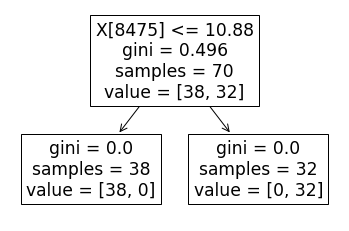

In [83]:
print("Decision Tree : \n" , tree.plot_tree(dtm_classifier))

#### Support vector machines model 

In [84]:
from sklearn import svm

1) Εκπαιδεύστε ένα μοντέλο SVM με τα δεδομένα από το training set.

In [85]:
svm_classifier = svm.SVC(kernel='linear', C=1).fit(trainingSet, trainingClass) # support vector machine model classifier

2) Τρέξτε το εκπαιδευμένο μοντέλο στα test δεδομένα και τυπώστε την πρόβλεψη του μοντέλου για κάθε δείγμα στο test dataset.

In [86]:
svm_predicted = svm_classifier.predict(testSet) # svm prediction
svm_predicted

array(['LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor', 'LungTumor',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'LungTumor'], dtype=object)

3) Τυπώστε το accuracy, confusion matrix

In [87]:
print("Accuracy :" ,svm_classifier.score(testSet, testClass))

Accuracy : 0.972972972972973


In [88]:
print("Confusion Matrix : \n"  , metrics.confusion_matrix(testClass, svm_predicted))

Confusion Matrix : 
 [[20  0]
 [ 1 16]]


#### Gene selection


In [89]:
import seaborn as sns

1) Να βρεθεί το επίπεδο σημαντικότητας κάθε μεταβλητής

In [90]:
significant_values = svm_classifier.coef_[0]
significant_values

array([-4.50325408e-04, -1.45755225e-04,  2.16066217e-04, ...,
        8.15540329e-05, -3.68002199e-05, -5.06451370e-05])

2) Επιλέξτε τα 100 γονίδια με το μέγιστο coef_ και τα 100 με το ελάχιστο.

In [91]:
signif_data = sorted_samples.copy()
signif_data['Significance'] = significant_values.copy()
signif_data # dataframe with all genes and their significance

,Gene,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Significance
0,1007_s_at,10.93,10.63,10.99,10.78,10.57,10.55,10.55,10.68,10.52,...,10.15,10.12,10.33,10.71,10.74,10.19,10.47,10.29,10.41,-0.000450
1,1053_at,6.90,7.55,6.83,6.72,6.74,7.10,6.98,7.16,6.86,...,6.76,6.55,6.77,6.71,6.74,7.01,6.80,6.79,6.36,-0.000146
2,117_at,8.11,7.97,7.78,7.78,7.89,8.01,8.61,7.90,8.07,...,8.58,8.07,7.61,7.85,7.81,8.14,7.86,8.16,7.97,0.000216
3,121_at,9.45,9.81,9.86,9.86,10.13,10.11,9.92,9.81,9.89,...,9.84,9.74,10.02,9.98,10.01,10.11,9.65,9.82,9.85,0.000088
4,1255_g_at,4.81,4.91,4.82,4.85,5.13,4.89,5.15,4.99,4.78,...,4.73,4.88,4.93,4.72,4.76,4.95,4.76,4.82,5.13,0.000153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,4.97,5.40,5.15,5.20,5.49,5.44,5.37,5.24,5.45,...,5.35,5.46,5.13,5.10,5.04,5.23,5.19,5.19,5.30,0.000107
22279,AFFX-ThrX-M_at,4.45,4.64,4.58,4.53,4.75,4.65,4.59,4.70,4.86,...,4.65,4.75,4.59,4.49,4.45,4.66,4.39,4.56,4.63,0.000010
22280,AFFX-TrpnX-3_at,4.03,4.07,4.07,3.99,4.16,4.07,4.35,4.15,4.40,...,4.27,4.17,4.06,4.12,4.12,4.01,4.09,4.10,4.14,0.000082
22281,AFFX-TrpnX-5_at,4.50,4.70,4.63,4.59,4.76,4.70,4.87,4.69,5.05,...,4.79,4.72,4.61,4.66,4.51,4.67,4.55,4.70,4.76,-0.000037


In [92]:
sorted_dataset = signif_data.sort_values(by=['Significance'])
sorted_dataset #sorted genes with significance

,Gene,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Significance
4001,204475_at,7.43,5.59,4.48,6.83,4.98,7.38,8.36,9.64,6.88,...,4.99,4.88,6.31,4.41,4.98,5.10,4.65,4.54,4.60,-0.004290
5764,206239_s_at,11.04,9.14,6.19,12.47,7.11,7.04,11.17,7.08,11.41,...,6.44,7.22,6.22,6.21,8.24,6.16,6.27,6.22,6.09,-0.004039
1411,201884_at,7.88,13.31,11.52,12.70,8.05,9.76,9.92,11.00,13.47,...,8.31,8.19,8.43,7.87,9.47,8.35,7.58,7.88,8.33,-0.003980
15992,216623_x_at,7.32,8.92,9.63,8.88,5.45,7.51,9.14,6.89,8.89,...,5.46,5.54,5.50,5.61,6.94,5.43,5.15,5.01,5.40,-0.003973
9360,209875_s_at,12.05,10.72,11.59,10.10,11.13,11.52,13.01,11.60,11.21,...,7.39,7.46,7.16,6.12,10.90,6.92,5.90,6.99,7.08,-0.003964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,219597_s_at,7.08,6.51,6.56,6.46,7.42,6.72,6.75,7.45,5.27,...,9.01,7.97,8.30,9.10,7.74,9.66,8.97,8.56,8.51,0.003008
3506,203980_at,8.90,5.87,5.93,7.78,6.34,6.75,6.39,8.64,7.76,...,10.56,10.73,11.02,11.35,9.83,11.34,11.69,11.23,11.64,0.003055
9564,210081_at,8.94,6.24,6.77,7.72,7.10,6.41,7.42,8.94,8.15,...,12.52,12.66,11.91,13.30,7.03,11.78,12.47,12.74,12.56,0.003370
5392,205866_at,10.54,7.11,8.11,7.66,8.64,7.07,7.71,9.44,6.65,...,11.19,12.51,9.66,12.82,7.48,11.27,11.97,12.68,11.94,0.003450


In [93]:
dataset = sorted_dataset.iloc[np.r_[0:100, -100:0], 0:]
dataset # 200 selected , sorted genes

,Gene,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Significance
4001,204475_at,7.43,5.59,4.48,6.83,4.98,7.38,8.36,9.64,6.88,...,4.99,4.88,6.31,4.41,4.98,5.10,4.65,4.54,4.60,-0.004290
5764,206239_s_at,11.04,9.14,6.19,12.47,7.11,7.04,11.17,7.08,11.41,...,6.44,7.22,6.22,6.21,8.24,6.16,6.27,6.22,6.09,-0.004039
1411,201884_at,7.88,13.31,11.52,12.70,8.05,9.76,9.92,11.00,13.47,...,8.31,8.19,8.43,7.87,9.47,8.35,7.58,7.88,8.33,-0.003980
15992,216623_x_at,7.32,8.92,9.63,8.88,5.45,7.51,9.14,6.89,8.89,...,5.46,5.54,5.50,5.61,6.94,5.43,5.15,5.01,5.40,-0.003973
9360,209875_s_at,12.05,10.72,11.59,10.10,11.13,11.52,13.01,11.60,11.21,...,7.39,7.46,7.16,6.12,10.90,6.92,5.90,6.99,7.08,-0.003964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,219597_s_at,7.08,6.51,6.56,6.46,7.42,6.72,6.75,7.45,5.27,...,9.01,7.97,8.30,9.10,7.74,9.66,8.97,8.56,8.51,0.003008
3506,203980_at,8.90,5.87,5.93,7.78,6.34,6.75,6.39,8.64,7.76,...,10.56,10.73,11.02,11.35,9.83,11.34,11.69,11.23,11.64,0.003055
9564,210081_at,8.94,6.24,6.77,7.72,7.10,6.41,7.42,8.94,8.15,...,12.52,12.66,11.91,13.30,7.03,11.78,12.47,12.74,12.56,0.003370
5392,205866_at,10.54,7.11,8.11,7.66,8.64,7.07,7.71,9.44,6.65,...,11.19,12.51,9.66,12.82,7.48,11.27,11.97,12.68,11.94,0.003450


3) Δημιουργήστε ένα heatmap με τα 200 αυτά γονίδια

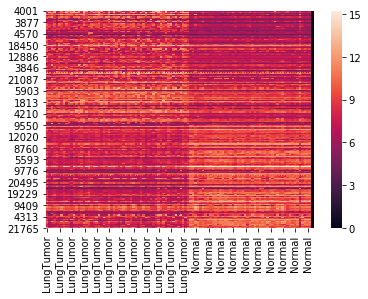

In [94]:
sns.heatmap(dataset.iloc[: , 1:])

## Data annotation

pip install mygene

In [95]:
import mygene
mg = mygene.MyGeneInfo()

1) Με τη χρήση της βιβλιοθήκης mygene βρείτε την ονομασία των 200 επιλεγμένων γονιδίων από το προηγούμενο βήμα σε ονοματολογία entrez

In [96]:
dataset # 200 selected , sorted genes

,Gene,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,LungTumor,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Significance
4001,204475_at,7.43,5.59,4.48,6.83,4.98,7.38,8.36,9.64,6.88,...,4.99,4.88,6.31,4.41,4.98,5.10,4.65,4.54,4.60,-0.004290
5764,206239_s_at,11.04,9.14,6.19,12.47,7.11,7.04,11.17,7.08,11.41,...,6.44,7.22,6.22,6.21,8.24,6.16,6.27,6.22,6.09,-0.004039
1411,201884_at,7.88,13.31,11.52,12.70,8.05,9.76,9.92,11.00,13.47,...,8.31,8.19,8.43,7.87,9.47,8.35,7.58,7.88,8.33,-0.003980
15992,216623_x_at,7.32,8.92,9.63,8.88,5.45,7.51,9.14,6.89,8.89,...,5.46,5.54,5.50,5.61,6.94,5.43,5.15,5.01,5.40,-0.003973
9360,209875_s_at,12.05,10.72,11.59,10.10,11.13,11.52,13.01,11.60,11.21,...,7.39,7.46,7.16,6.12,10.90,6.92,5.90,6.99,7.08,-0.003964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18960,219597_s_at,7.08,6.51,6.56,6.46,7.42,6.72,6.75,7.45,5.27,...,9.01,7.97,8.30,9.10,7.74,9.66,8.97,8.56,8.51,0.003008
3506,203980_at,8.90,5.87,5.93,7.78,6.34,6.75,6.39,8.64,7.76,...,10.56,10.73,11.02,11.35,9.83,11.34,11.69,11.23,11.64,0.003055
9564,210081_at,8.94,6.24,6.77,7.72,7.10,6.41,7.42,8.94,8.15,...,12.52,12.66,11.91,13.30,7.03,11.78,12.47,12.74,12.56,0.003370
5392,205866_at,10.54,7.11,8.11,7.66,8.64,7.07,7.71,9.44,6.65,...,11.19,12.51,9.66,12.82,7.48,11.27,11.97,12.68,11.94,0.003450


In [97]:
signif_genes =dataset['Gene']
signif_genes #names of selected genes

4001       204475_at
5764     206239_s_at
1411       201884_at
15992    216623_x_at
9360     209875_s_at
            ...     
18960    219597_s_at
3506       203980_at
9564       210081_at
5392       205866_at
14826    215454_x_at
Name: Gene, Length: 200, dtype: object

In [98]:
entrez_name = mg.querymany(signif_genes , scopes = 'reporter', fields='entrez', species='human', as_dataframe=True)
entrez_name # dataframe with entrez id , matched with 200 selected genes

querying 1-200...done.
Finished.
6 input query terms found dup hits:
	[('220057_at', 2), ('205890_s_at', 2), ('209631_s_at', 2), ('210869_s_at', 2), ('205200_at', 2), ('2
2 input query terms found no hit:
	['AFFX-r2-Hs28SrRNA-3_at', '206658_at']
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


,_id,_score,notfound
query,,,
204475_at,4312,12.414616,NaN
206239_s_at,6690,12.400125,NaN
201884_at,1048,13.215434,NaN
216623_x_at,27324,13.215434,NaN
209875_s_at,6696,12.400125,NaN
...,...,...,...
219597_s_at,53905,13.206395,NaN
203980_at,2167,13.215434,NaN
210081_at,177,12.414616,NaN


2) KEGG human pathways

In [99]:
kegg_data = pd.read_csv("http://139.91.190.186/tei/bioinformatics/c2.cp.kegg.v7.1.entrez.gmt",header=None, sep = '\t')

In [100]:
kegg_data

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,388,389,390
0,KEGG_GLYCOLYSIS_GLUCONEOGENESIS,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,55902,2645,5232,5230,5162,5160,5161,55276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KEGG_CITRATE_CYCLE_TCA_CYCLE,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,3420,1743,5106,1431,5162,5105,5160,5161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KEGG_PENTOSE_PHOSPHATE_PATHWAY,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,6120,22934,55276,25796,5634,8789,5213,5211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,54575,54576,6120,54577,54578,54490,54579,51084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,4351,5373,5372,8789,5213,2762,5210,5211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,KEGG_PRIMARY_IMMUNODEFICIENCY,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,7535,920,115650,8517,3561,5994,6891,5993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,781,782,783,784,785,786,7124,3680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMY...,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,781,782,783,784,785,786,3680,59283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,KEGG_DILATED_CARDIOMYOPATHY,http://www.gsea-msigdb.org/gsea/msigdb/cards/K...,781,782,783,114,784,115,785,112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
kegg_data.index = kegg_data[0] #set kegg name as index name
kegg_data.pop(0) #delete kegg genes names
kegg_data.pop(1) #delete url
kegg_data.columns = range(kegg_data.shape[1]) # rename all columns

In [102]:
kegg_data

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,388
0,,,,,,,,,,,,,,,,,,,,,
KEGG_GLYCOLYSIS_GLUCONEOGENESIS,55902,2645,5232,5230,5162,5160,5161,55276,7167,84532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_CITRATE_CYCLE_TCA_CYCLE,3420,1743,5106,1431,5162,5105,5160,5161,283398,2271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_PENTOSE_PHOSPHATE_PATHWAY,6120,22934,55276,25796,5634,8789,5213,5211,6888,7086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,54575,54576,6120,54577,54578,54490,54579,51084,7358,10941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM,4351,5373,5372,8789,5213,2762,5210,5211,9107,7167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_PRIMARY_IMMUNODEFICIENCY,7535,920,115650,8517,3561,5994,6891,5993,925,926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,781,782,783,784,785,786,7124,3680,3479,6262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,781,782,783,784,785,786,3680,59283,6262,3728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3) Βρείτε τα 2 pathways που περιέχουν τα περισσότερα γονίδια από τη λιστα των επιλεγμένων διακοσίων και τυπώστε το όνομα τους.

In [103]:
kegg_genes_list =[] 
mini_set = set()
for x in range(len(kegg_data.index)):
    for y in range (len(kegg_data.columns)):
        if(pd.notnull(kegg_data.iloc[x , y])):
            mini_set.add(kegg_data.iloc[x , y])
    kegg_genes_list.append(mini_set.copy())
    mini_set.clear()

In [104]:
entrez_name_sets = set() # set with gene IDs
for x in range (len(entrez_name)):
    if(pd.notnull(entrez_name.iloc[x,0])):
        entrez_name_sets.add(entrez_name.iloc[x,0])

In [105]:
cnt_significant = {} # dictionary that each element is the number of row and 
# the total count of values equals to kegg
counter = 0
gene_cnt = 0
for x in kegg_genes_list: # for means
    for y in (entrez_name_sets):
        if ( int(y) in x ):
            gene_cnt+=1
    cnt_significant.update({counter:gene_cnt})
    gene_cnt = 0
    counter += 1

In [106]:
max_values = {}    #find the max value and its position
max = -1
max_thesis = -1
for x in cnt_significant:     # Means
    if(cnt_significant.get(x) >= max):
        max = cnt_significant.get(x)
        max_thesis = x
        max_values.update({max_thesis : max})
for y in max_values.copy():
    if( max_values.get(y) < max):
        max_values.pop(y)
  
prev_max_values = {}  # finf the next max value and its position
prev_max = -1
prev_max_thesis = -1

for x in cnt_significant:     # Means
    if(cnt_significant.get(x) >= prev_max and cnt_significant.get(x) < max):
        prev_max = cnt_significant.get(x)
        prev_max_thesis = x
        prev_max_values.update({prev_max_thesis : prev_max})

for y in prev_max_values.copy():
    if( prev_max_values.get(y) < prev_max):
        prev_max_values.pop(y)

In [116]:
max_values_key = max_values.keys()
prev_max_values_key = prev_max_values.keys()

In [117]:
print("Pathway including most genes :" )
for x in max_values_key:
    pathway1 = kegg_data.index[x]
    gene1 = 
#     print("\t",kegg_data.index[x])
    print("\t" , pathway1)
    
print("\nPathway including next most genes :" )
for x in prev_max_values_key:
    pathway2 = kegg_data.index[x]
    print("\t", pathway2)
#     print("\t",kegg_data.index[x])

Pathway including most genes :
	 KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION

Pathway including next most genes :
	 KEGG_CHEMOKINE_SIGNALING_PATHWAY


#### Pathway viewer  

1) Με τη βοήθεια της IPython.display.HTML και σε δυο iframes οπτικοποιήστε τα 2 pathways από το προηγούμενο βήμα.

In [119]:
print(pathway1 ,"\n",pathway2)

KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION 
 KEGG_CHEMOKINE_SIGNALING_PATHWAY


In [123]:
pathway_name1 = 'hsa04060'
url = 'https://www.genome.jp/kegg-bin/show_pathway?'+pathway_name1 

iframe = '<iframe src=' + url +' width=800 height=600> </iframe>'
import IPython
IPython.display.HTML(iframe)

C:\Users\sfina\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [124]:
pathway_name2 = 'hsa04062'
url = 'https://www.genome.jp/kegg-bin/show_pathway?'+pathway_name2 

iframe = '<iframe src=' + url +' width=800 height=600> </iframe>'
import IPython
IPython.display.HTML(iframe)

2) Kάντε αναζήτηση για το συγκεκριμένο pathway και την ασθένεια (Lung Cancer)

### 1) Cytokine-cytokine receptor interaction : 'hsa04060' and Lung Gancer

KEGG pathway analysis was performed for the 1318 DEGs with DAVID online tools to identify disturbed biological functions. 9 terms meeting the cut-off (EASE score < 0.01) were obtained.
As shown  DEGs were enriched in following function groups: 
(1) cell cycle 
(2) DNA replication
(3) immune function 
(4) signaling molecules and interactions (cytokine-cytokine receptor interaction, cell adhesion molecules (CAMs), ECM-receptor interaction).
GO enrichment analysis was also conducted for the DEGs. A total of 74 terms were significantly over-represented with FDR < 0.05 as cutoff. Significantly altered function terms were:
cell cycle-related terms, immune-related terms , blood vessel development-related terms.
These terms were closely associated with the pathogenesis of lung cancer, thus the 528 DEGs enriched in these terms were gathered for further analysis.

###### Screening of biomarkers for lung cancer with gene expression profiling data -European Review for Medical and Pharmacological Sciences : 2013 


### 2) Chemokine signaling pathway : ' hsa04062' and Lung Cancer

In the chemokine signaling pathway (hsa04062; KEGG database), chemokines are a type of small chemoattractant peptide, which may provide directional cues for cell trafficking; this is the key for the protective host response . In addition, chemokines regulate a plethora of biological processes in hematopoietic cells that lead to cellular activation, differentiation and survival. A previous study has revealed that chemokines are vital in the pathogenesis of NSCLC and NSCLC cells are rich in the secreted protein CXCL12. Another study has suggested that the methylation of CXCL12 has a marked correlation with NSCLC prognosis, and that CXCL12-mediated adhesion and survival signals are associated with chemo-resistance in lung cancer.

###### Hub genes and key pathways of non‑small lung cancer identified using bioinformatics - Qing Tang,Hongmei Zhang, Man Kong : 2018